In [19]:
#this week let's import the data and explore the parameter space 
#for a linear regression model 
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
os.getcwd()

'/Users/gekim/Desktop/Chesapeake-Bay-machine-learning-tutorial/week1'

In [21]:
#import data and convert dates to datetime format
df=pd.read_csv('WaterQualityWaterQualityStation.csv')
df['SampleDate']=pd.to_datetime(df.SampleDate)
df.SampleDate.head()

0   2014-11-19
1   2014-11-19
2   2014-11-19
3   2014-11-19
4   2014-11-19
Name: SampleDate, dtype: datetime64[ns]

In [22]:
#sort by ascending sample date
#then filter to only use august samples in the analysis 
df=df.sort_values(by=['SampleDate','Depth'])
df_filtered = df.query('SampleDate.dt.month==8')
oxygen_df=df_filtered[df_filtered['Parameter'].str.match('DO')]
salt_df=df_filtered[df_filtered['Parameter'].str.match('SALINITY')]

In [23]:
oxygen_df.head()

,MonitoringStation,EventId,Cruise,Program,Project,Agency,Source,Station,SampleDate,SampleTime,...,MeasureValue,Unit,Method,Lab,Problem,PrecisionPC,BiasPC,Details,Latitude,Longitude
236,CB4.2C,397079.0,BAY654,TWQM,MAIN,MDDNR,MDDNR,CB4.2C,2015-08-04,10:51:00,...,8.5,MG/L,F01,NaN,NaN,NaN,NaN,NaN,38.64618,-76.42127
219,CB4.2C,397079.0,BAY654,TWQM,MAIN,MDDNR,MDDNR,CB4.2C,2015-08-04,10:51:00,...,8.4,MG/L,F01,NaN,NaN,NaN,NaN,NaN,38.64618,-76.42127
220,CB4.2C,397079.0,BAY654,TWQM,MAIN,MDDNR,MDDNR,CB4.2C,2015-08-04,10:51:00,...,8.1,MG/L,F01,NaN,NaN,NaN,NaN,NaN,38.64618,-76.42127
221,CB4.2C,397079.0,BAY654,TWQM,MAIN,MDDNR,MDDNR,CB4.2C,2015-08-04,10:51:00,...,7.6,MG/L,F01,NaN,NaN,NaN,NaN,NaN,38.64618,-76.42127
222,CB4.2C,397079.0,BAY654,TWQM,MAIN,MDDNR,MDDNR,CB4.2C,2015-08-04,10:51:00,...,7.2,MG/L,F01,NaN,NaN,NaN,NaN,NaN,38.64618,-76.42127


In [24]:
salt_df.head()

,MonitoringStation,EventId,Cruise,Program,Project,Agency,Source,Station,SampleDate,SampleTime,...,MeasureValue,Unit,Method,Lab,Problem,PrecisionPC,BiasPC,Details,Latitude,Longitude
2571,CB4.2C,397079.0,BAY654,TWQM,MAIN,MDDNR,MDDNR,CB4.2C,2015-08-04,10:51:00,...,10.17,PPT,F01,NaN,NaN,NaN,NaN,NaN,38.64618,-76.42127
2588,CB4.2C,397079.0,BAY654,TWQM,MAIN,MDDNR,MDDNR,CB4.2C,2015-08-04,10:51:00,...,10.17,PPT,F01,NaN,NaN,NaN,NaN,NaN,38.64618,-76.42127
2587,CB4.2C,397079.0,BAY654,TWQM,MAIN,MDDNR,MDDNR,CB4.2C,2015-08-04,10:51:00,...,10.17,PPT,F01,NaN,NaN,NaN,NaN,NaN,38.64618,-76.42127
2586,CB4.2C,397079.0,BAY654,TWQM,MAIN,MDDNR,MDDNR,CB4.2C,2015-08-04,10:51:00,...,10.17,PPT,F01,NaN,NaN,NaN,NaN,NaN,38.64618,-76.42127
2585,CB4.2C,397079.0,BAY654,TWQM,MAIN,MDDNR,MDDNR,CB4.2C,2015-08-04,10:51:00,...,10.43,PPT,F01,NaN,NaN,NaN,NaN,NaN,38.64618,-76.42127


In [25]:
#check that the corresponding values are matched 
#by making sure the sample date and depths are all the same 
o2_list = oxygen_df[['SampleDate','Depth']]
salt_list = salt_df[['SampleDate','Depth']]
check=(o2_list.reset_index()==salt_list.reset_index())
check.SampleDate.value_counts(),check.Depth.value_counts()

(True    180
 Name: SampleDate, dtype: int64, True    180
 Name: Depth, dtype: int64)

In [26]:
#keep just the values
oxygen=oxygen_df.MeasureValue.to_numpy()
salt=salt_df.MeasureValue.to_numpy()

In [27]:
oxygen[0:10]

array([8.5 , 8.4 , 8.1 , 7.6 , 7.2 , 6.9 , 6.4 , 3.3 , 0.87, 0.24])

In [28]:
salt[0:10]

array([10.17, 10.17, 10.17, 10.17, 10.43, 10.56, 10.76, 12.59, 14.33,
       16.43])

In [29]:
oxygen.shape, salt.shape

((180,), (180,))

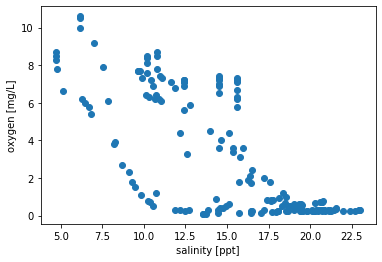

In [30]:
#make a scatter plot to look at the data
plt.plot(salt,oxygen,'o')
plt.xlabel('salinity [ppt]')
plt.ylabel('oxygen [mg/L]')
plt.show()

In [31]:
x=np.linspace(salt.min(),salt.max(),100)
y=np.linspace(oxygen.min(),oxygen.max(),100)

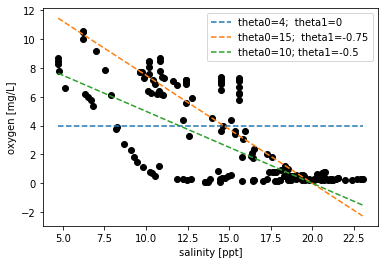

In [32]:
#in this example, salinity is our input variable and oxygen is our output or target variable
#let's try a linear regression with one variable (h=theta_0+theta_1*x) 
#plot some lines with possible values for the parameters 
theta0=[4, 15, 10]
theta1=[0, -.75, -.5]

#calculate the values for our three hypotheses 
h_0=theta0[0]+theta1[0]*x
h_1=theta0[1]+theta1[1]*x
h_2=theta0[2]+theta1[2]*x

plt.plot(salt,oxygen,'ko')
plt.xlabel('salinity [ppt]')
plt.ylabel('oxygen [mg/L]')
plt.plot(x,h_0,'--',label='theta0=4;  theta1=0')
plt.plot(x,h_1,'--',label='theta0=15;  theta1=-0.75')
plt.plot(x,h_2,'--',label='theta0=10; theta1=-0.5')
plt.legend()
plt.show()

In [33]:
#what's the cost value for these three guesses of (theta0, theta1)
m=len(salt)
cost=np.zeros((3,1))
#calculate cost function. loop through the parameter values this time
for i in range(len(theta0)):
    h=theta0[i]+theta1[i]*salt
    squared_error = np.square(h - oxygen)
    cost[i] = (1/(2*m))*np.sum(squared_error)

cost

array([[5.60034306],
       [3.14784373],
       [2.48180882]])

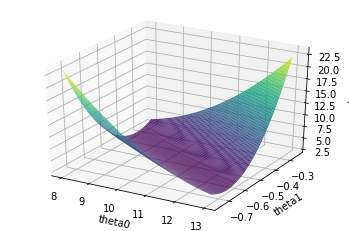

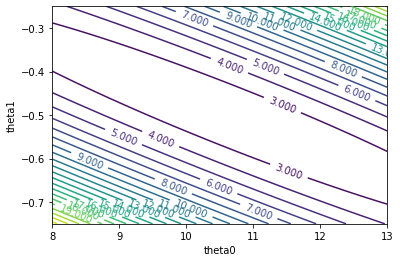

In [34]:
#make a plot of the cost function in parameter space 

x_theta0=np.linspace(8,13,100)
y_theta1=np.linspace(-.75,-.25,100)
(X_theta0, Y_theta1) = np.meshgrid(x_theta0, y_theta1)

def compute_cost(theta0,theta1):
    cost=np.zeros((len(theta0), len(theta1)))
    for i in range(len(theta0)):
        for j in range(len(theta1)):
            h=theta0[i,j]+theta1[i,j]*salt
            squared_error = np.square(h - oxygen)
            cost[i,j] = (1/(2*m))*np.sum(squared_error)
    return cost

Z = compute_cost(X_theta0, Y_theta1)

#surface plot 
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_theta0, Y_theta1, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J')
plt.show()

#contour plot
import matplotlib.cm as cm
fig, ax = plt.subplots()
CS = ax.contour(X_theta0, Y_theta1,Z, 25)
ax.clabel(CS, fontsize=10)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
plt.show()

In [18]:
#next week I will implement the gradient descent algorithm 
#to find the cost function minimum and then try adding 
#another variable for multiple linear regression 